# Lab 15 - PCA
## Lecture 15

In [1]:
pokemon = read.csv('data/poke/pokemon.csv')

In [2]:
head(pokemon)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>
1,"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,...,88.1,1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,...,88.1,2,80,80,60,grass,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,...,88.1,3,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.50,1,1,1.0,0.5,1.0,0.5,1,1,...,88.1,4,60,50,65,fire,,8.5,1,0
5,"['Blaze', 'Solar Power']",0.50,1,1,1.0,0.5,1.0,0.5,1,1,...,88.1,5,80,65,80,fire,,19.0,1,0
6,"['Blaze', 'Solar Power']",0.25,1,1,2.0,0.5,0.5,0.5,1,1,...,88.1,6,159,115,100,fire,flying,90.5,1,0


In [3]:
colnames(pokemon)

[1] "abilities"         "against_bug"       "against_dark"     
 [4] "against_dragon"    "against_electric"  "against_fairy"    
 [7] "against_fight"     "against_fire"      "against_flying"   
[10] "against_ghost"     "against_grass"     "against_ground"   
[13] "against_ice"       "against_normal"    "against_poison"   
[16] "against_psychic"   "against_rock"      "against_steel"    
[19] "against_water"     "attack"            "base_egg_steps"   
[22] "base_happiness"    "base_total"        "capture_rate"     
[25] "classfication"     "defense"           "experience_growth"
[28] "height_m"          "hp"                "japanese_name"    
[31] "name"              "percentage_male"   "pokedex_number"   
[34] "sp_attack"         "sp_defense"        "speed"            
[37] "type1"             "type2"             "weight_kg"        
[40] "generation"        "is_legendary"

In [4]:
head(pokemon$name)

[1] "Bulbasaur"  "Ivysaur"    "Venusaur"   "Charmander" "Charmeleon"
[6] "Charizard"

In [5]:
dim(pokemon)

[1] 801  41

In [9]:
which_numeric = sapply(1:ncol(pokemon),function(i)is.numeric(pokemon[,i])&&all(is.finite(pokemon[,i])))

In [10]:
head(which_numeric)

[1] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

In [11]:
sum(which_numeric)

[1] 31

In [12]:
poke = pokemon[,which_numeric]

In [13]:
head(poke)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,base_total,defense,experience_growth,hp,pokedex_number,sp_attack,sp_defense,speed,generation,is_legendary
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1.00,1,1,0.5,0.5,0.5,2.0,2,1,0.25,...,318,49,1059860,45,1,65,65,45,1,0
2,1.00,1,1,0.5,0.5,0.5,2.0,2,1,0.25,...,405,63,1059860,60,2,80,80,60,1,0
3,1.00,1,1,0.5,0.5,0.5,2.0,2,1,0.25,...,625,123,1059860,80,3,122,120,80,1,0
4,0.50,1,1,1.0,0.5,1.0,0.5,1,1,0.50,...,309,43,1059860,39,4,60,50,65,1,0
5,0.50,1,1,1.0,0.5,1.0,0.5,1,1,0.50,...,405,58,1059860,58,5,80,65,80,1,0
6,0.25,1,1,2.0,0.5,0.5,0.5,1,1,0.25,...,634,78,1059860,78,6,159,115,100,1,0


## Method 1: prcomp in MASS

In [14]:
library('MASS')

In [15]:
?prcomp

prcomp {stats},R Documentation
formula,"a formula with no response variable, referring only to numeric variables."
data,an optional data frame (or similar: see model.frame) containing the variables in the formula formula. By default the variables are taken from environment(formula).
subset,an optional vector used to select rows (observations) of the data matrix x.
na.action,"a function which indicates what should happen when the data contain NAs. The default is set by the na.action setting of options, and is na.fail if that is unset. The ‘factory-fresh’ default is na.omit."
...,arguments passed to or from other methods. If x is a formula one might specify scale. or tol.
x,a numeric or complex matrix (or data frame) which provides the data for the principal components analysis.
retx,a logical value indicating whether the rotated variables should be returned.
center,"a logical value indicating whether the variables should be shifted to be zero centered. Alternately, a vector of length equal the number of columns of x can be supplied. The value is passed to scale."
scale.,"a logical value indicating whether the variables should be scaled to have unit variance before the analysis takes place. The default is FALSE for consistency with S, but in general scaling is advisable. Alternatively, a vector of length equal the number of columns of x can be supplied. The value is passed to scale."
tol,"a value indicating the magnitude below which components should be omitted. (Components are omitted if their standard deviations are less than or equal to tol times the standard deviation of the first component.) With the default null setting, no components are omitted (unless rank. is specified less than min(dim(x)).). Other settings for tol could be tol = 0 or tol = sqrt(.Machine$double.eps), which would omit essentially constant components."


In [16]:
pc.out = prcomp(x=poke,center=TRUE)

In [17]:
pc.out

Standard deviations (1, .., p=31):
 [1] 1.602746e+05 6.082403e+03 2.269205e+02 1.113705e+02 3.125150e+01
 [6] 2.705691e+01 2.365820e+01 2.018922e+01 1.601365e+01 1.526984e+01
[11] 1.210028e+00 9.012878e-01 8.331723e-01 7.850372e-01 7.322888e-01
[16] 6.618624e-01 5.944003e-01 4.901762e-01 4.653256e-01 4.390060e-01
[21] 3.717427e-01 3.191355e-01 3.025287e-01 2.613702e-01 2.501019e-01
[26] 1.950894e-01 1.494445e-01 1.395827e-01 1.294993e-01 1.138078e-01
[31] 1.597952e-11

Rotation (n x k) = (31 x 31):
                            PC1           PC2           PC3           PC4
against_bug       -1.332088e-07 -5.161246e-06 -2.310994e-05  2.717496e-04
against_dark       2.261244e-08 -1.478372e-05 -5.392180e-05  8.688834e-05
against_dragon    -3.802301e-07 -6.268564e-06 -5.300331e-05  7.152226e-05
against_electric   1.700520e-07  5.388445e-06 -1.649688e-04 -1.166211e-04
against_fairy     -4.770008e-07 -6.093989e-06  3.569817e-04 -1.178175e-04
against_fight     -4.654430e-08  1.302058e-06  6.632

In [18]:
W = pc.out$rotation

In [19]:
dim(W)

[1] 31 31

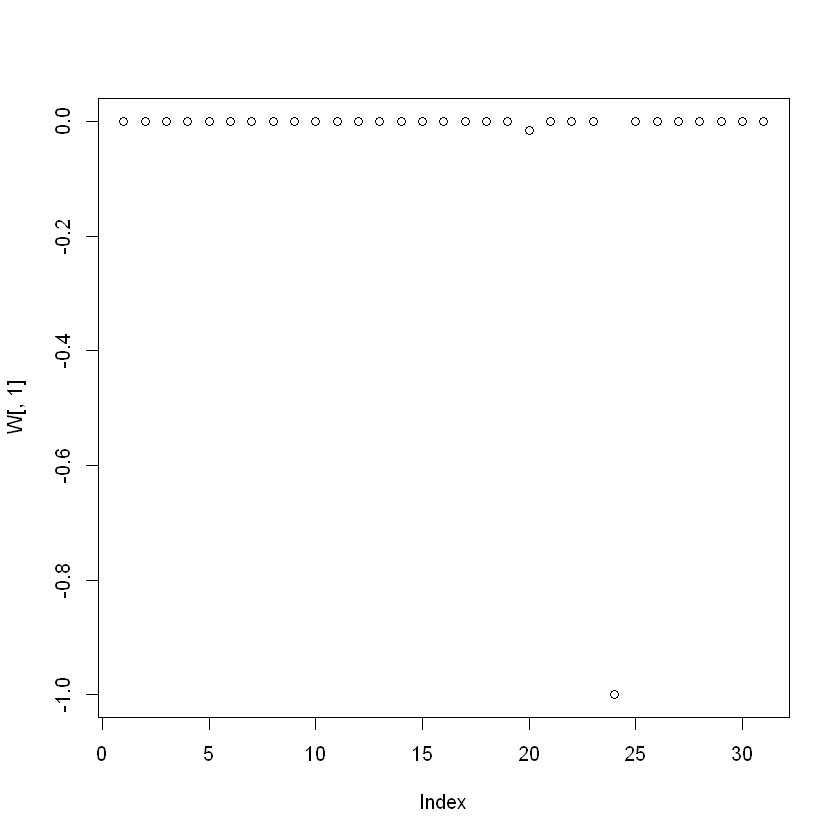

In [21]:
plot(W[,1])

In [22]:
which.max(W[,1])

base_happiness 
            21

In [23]:
poke$base_happiness

[1]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
 [19]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70 140 140
 [37]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
 [55]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
 [73]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
 [91]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
[109]  70  70  70  70 140  70  70  70  70  70  70  70  70  70  70  70  70  70
[127]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  35
[145]  35  35  35  35  35   0 100  70  70  70  70  70  70  70  70  70  70  70
[163]  70  70  70  70  70  70  70  70  70  70 140  70  70  70  70  70  70  70
[181]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  35  35
[199]  70  35  70  70  70  70  70  70  70  70  70  70  70  70  70  70  35  70
[217]  70  70  70  70  70  70  70  70  70  70  70  35  35  70  70  70  70  70
[235]  70  70  70  70  70  70  70 140  35  35  35  35  35  35   0   0 100  70
[253]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
[271]  70  70  70  70  70  70  70  70  70  35  35  35  70  70  70  70  70  70
[289]  70  70  70  70  70  70  70  70  70  70  70  70  70  35  70  35  35  35
[307]  70  70  70  70  70  70  70  70  70  70  70  35  35  70  70  70  70  70
[325]  70  70  70  70  70  70  35  35  70  70  70  70  70  70  70  70  70  70
[343]  70  70  70  70  70  70  70  70  70  70  35  35  35  35  70  70  35  70
[361]  70  70  70  70  70  70  70  70  70  70  35  35  35  35  35  35  35  35
[379]  35  90  90   0   0   0 100   0  70  70  70  70  70  70  70  70  70  70
[397]  70  70  70  70  70  70  70 100  70  70  70  70  70  70  70  70  70  70
[415]  70  70 100  70  70  70  70  70  70 100  70  70   0 140  35  35  70  70
[433]  70  70  70  70  70  70  70 140  35  70  70  70  70  70  70  70  70  70
[451]  70  70 100  70  70  70  70  70  70  70  35  70  70  70  70  70  70  70
[469]  70  35  35  70  70  70  35  70  35  70  70 140 140 140   0   0 100   0
[487]   0 100  70  70   0 100   0 100  70  70  70  70  70  70  70  70  70  70
[505]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
[523]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
[541]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
[559]  35  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
[577]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
[595]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  35  35  35
[613]  70  70  70  70  70  70  70  70  70  70  70  35  35  70  70  70  35  35
[631]  70  70  35  35  35  70  70  35  35  35  90  90   0   0  90   0  35 100
[649]   0  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
[667]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
[685]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
[703]  70  35  35  35  70  70  70  70  70  70  70  70  70   0   0   0  70 100
[721] 100  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
[739]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
[757]  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70   0   0  70
[775]  70  70  70  70  70  70  70  70  70  70  70  70  70  70   0   0   0   0
[793]   0   0   0   0   0   0   0   0   0

In [24]:
pc.out = prcomp(x=poke,center=TRUE,scale=TRUE)

In [25]:
W = pc.out$rotation

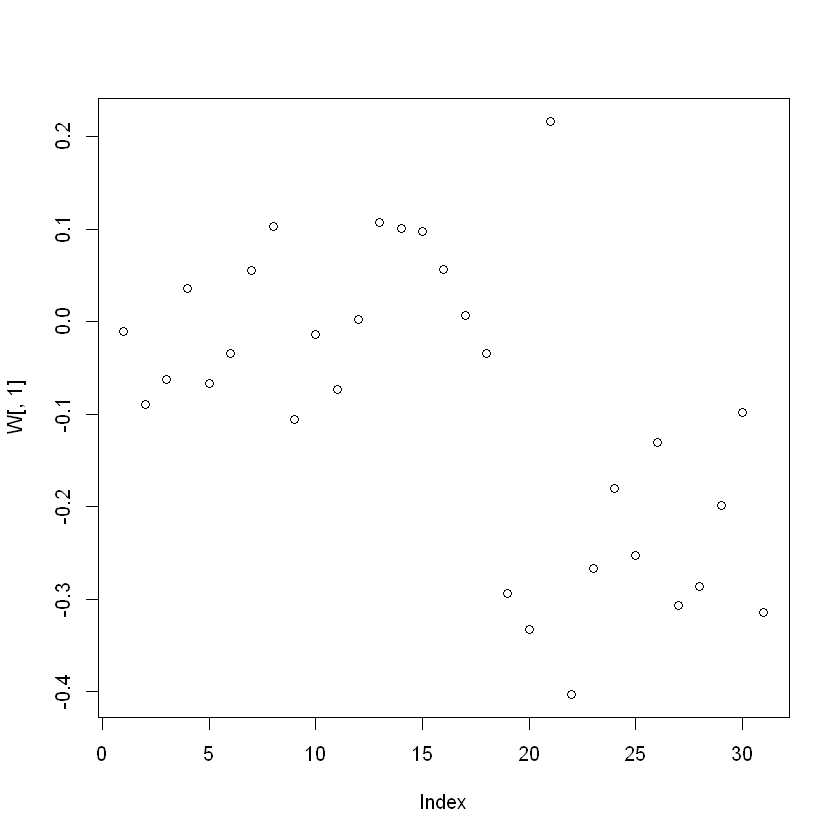

In [27]:
plot(W[,1])

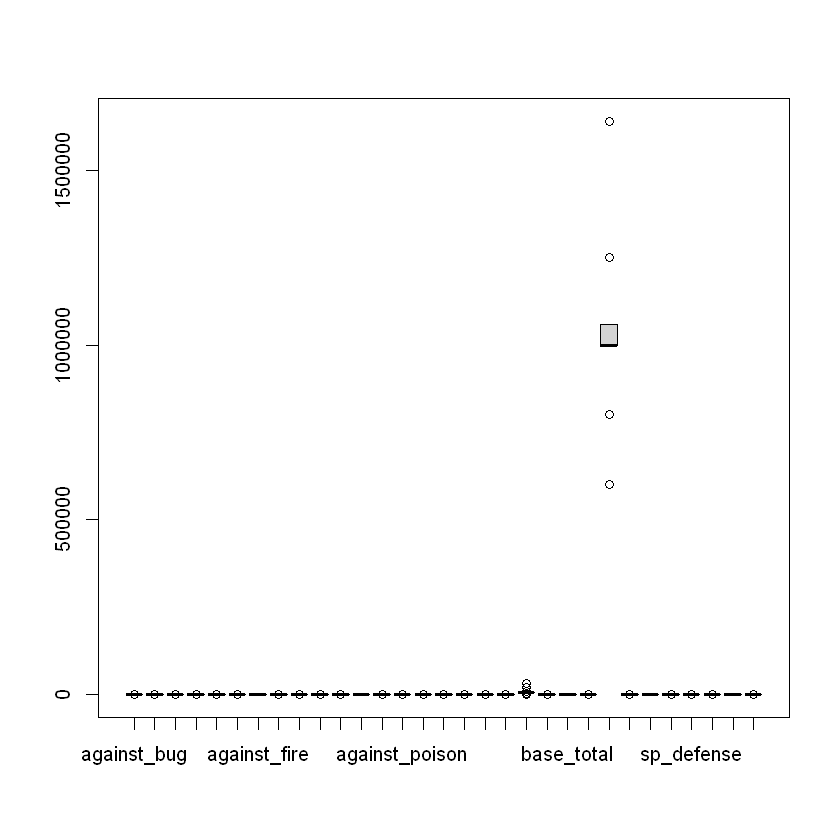

In [29]:
boxplot(poke)

In [30]:
which.max(colMeans(poke))

experience_growth 
               24

In [31]:
vars = pc.out$sdev^2

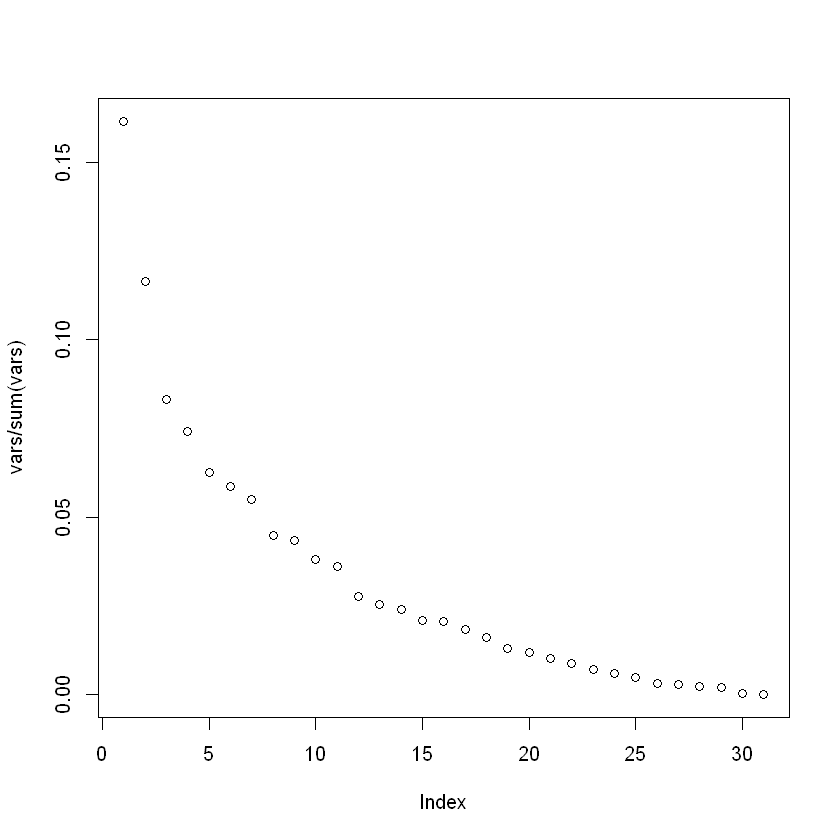

In [33]:
plot(vars/sum(vars))

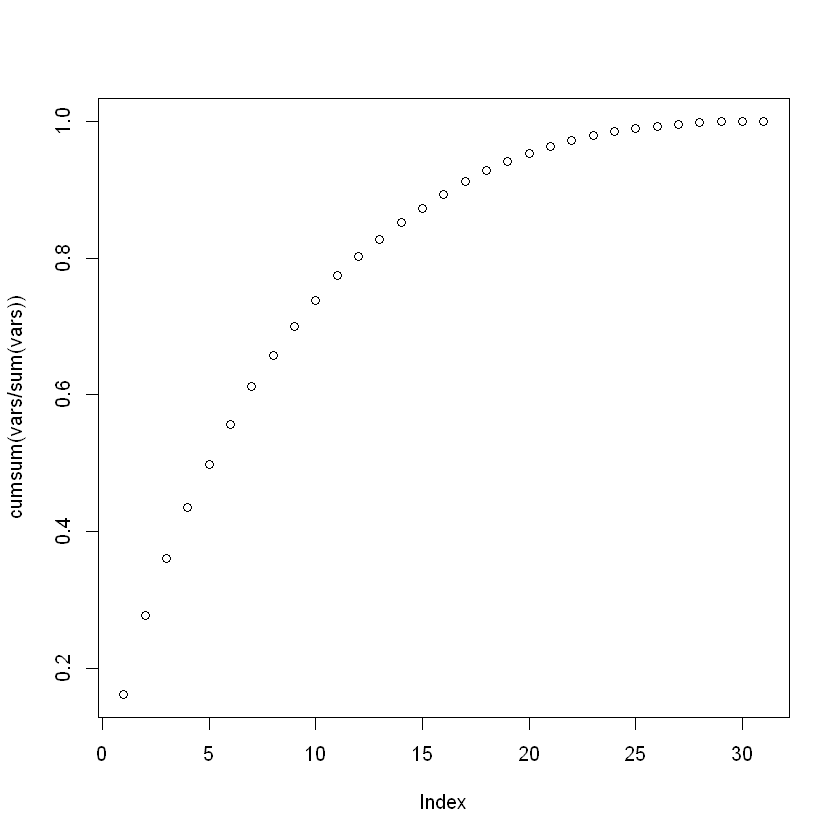

In [35]:
plot(cumsum(vars/sum(vars)))

In [41]:
X = scale(poke,center=TRUE,scale=TRUE)

In [42]:
Z = as.matrix(X) %*% W[,1:10]

In [43]:
head(Z)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
2.5114720,1.3203260,1.1578782,-0.5875952,-0.5098712,2.2417638,1.4787415,1.0902371,-1.2075563,0.18019396
1.4349050,1.4571209,1.1087449,-0.9646223,-0.3154829,2.6769344,1.2007202,0.6074115,-1.2509659,-0.01366361
-1.3121511,1.6276338,1.0521001,-1.6715266,0.2560963,3.9639865,0.5195514,-0.6778381,-1.4385593,-0.66305924
2.0907194,-1.7847434,0.7911439,-2.0263864,-0.5100777,0.1012485,0.7131379,1.6064690,0.3853927,0.02658700
0.8986775,-1.6293532,0.7443067,-2.4439698,-0.3075698,0.5700817,0.3885203,1.0736585,0.3290589,-0.15989341
-1.5539074,0.6505773,2.0128187,-5.0038566,0.7025986,0.6998691,-0.4143004,-0.9567855,2.5466961,-0.73054150


In [40]:
summary(pc.out)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.2380 1.9002 1.60607 1.51743 1.39459 1.34974 1.3069
Proportion of Variance 0.1616 0.1165 0.08321 0.07428 0.06274 0.05877 0.0551
Cumulative Proportion  0.1616 0.2780 0.36125 0.43553 0.49827 0.55703 0.6121
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.17992 1.16081 1.08751 1.05611 0.92724 0.88829 0.86065
Proportion of Variance 0.04491 0.04347 0.03815 0.03598 0.02773 0.02545 0.02389
Cumulative Proportion  0.65704 0.70051 0.73866 0.77464 0.80238 0.82783 0.85172
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.80551 0.80177 0.75384 0.70502 0.63714 0.60342 0.56463
Proportion of Variance 0.02093 0.02074 0.01833 0.01603 0.01309 0.01175 0.01028
Cumulative Proportion  0.87265 0.89339 0.91172 0.92776 0.94085 0.95260 0.96288
                          PC22   PC23 

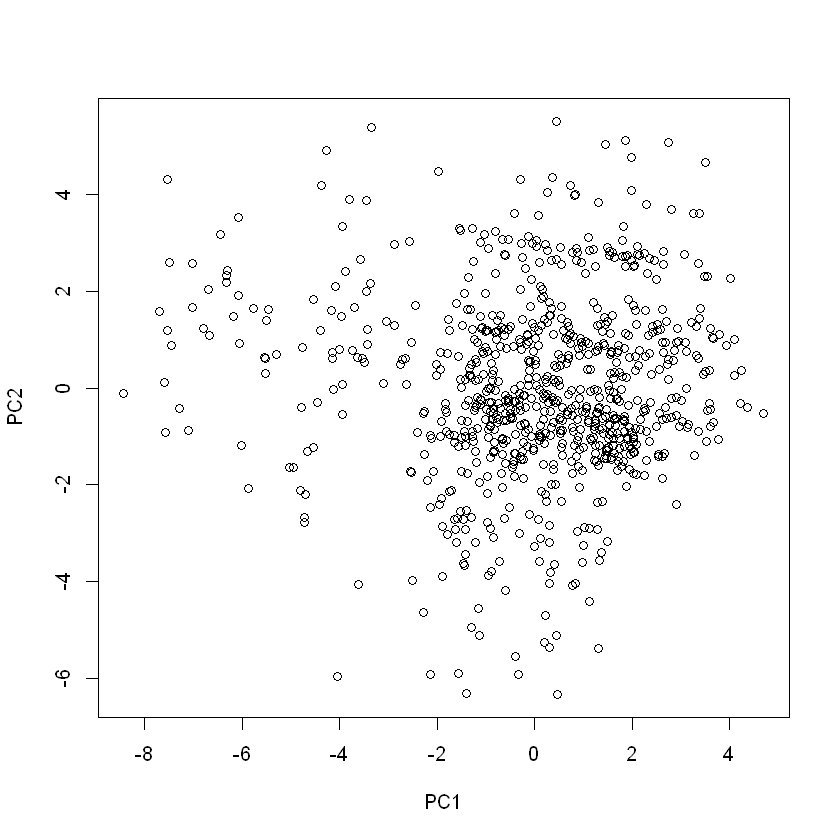

In [44]:
plot(Z[,1:2])

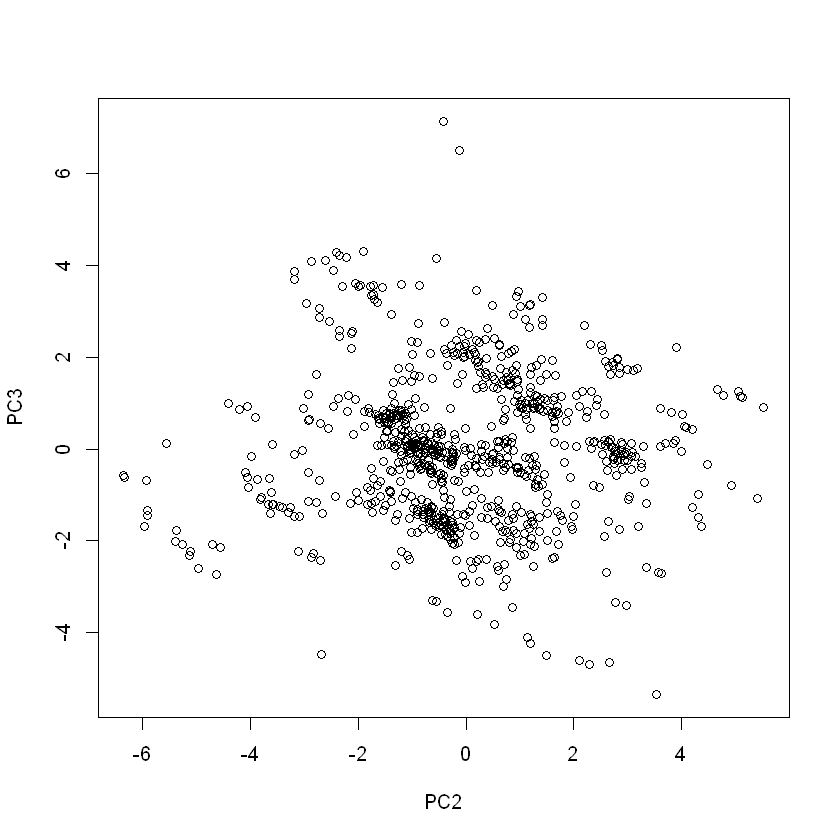

In [45]:
plot(Z[,2:3])

## Method 2: SVD

In [46]:
svdx = svd(X)

In [47]:
W2 = svdx$v[,1:10]

In [48]:
Z2 = X%*%W2

In [49]:
max(Z-Z2)

[1] 0

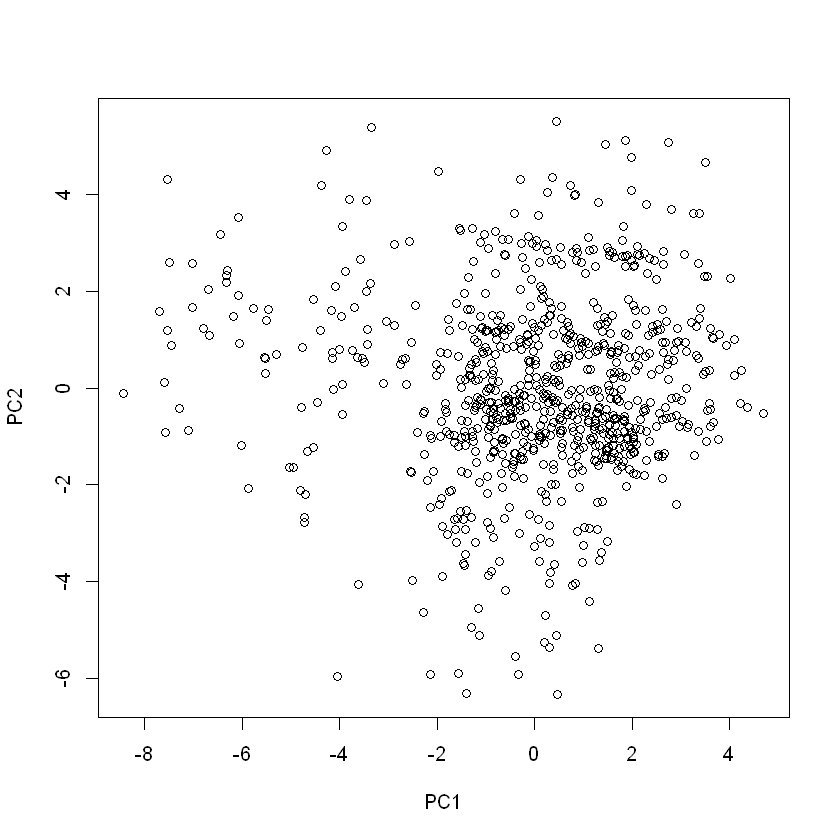

In [50]:
plot(Z[,1:2])

In [51]:
vars = svdx$d^2

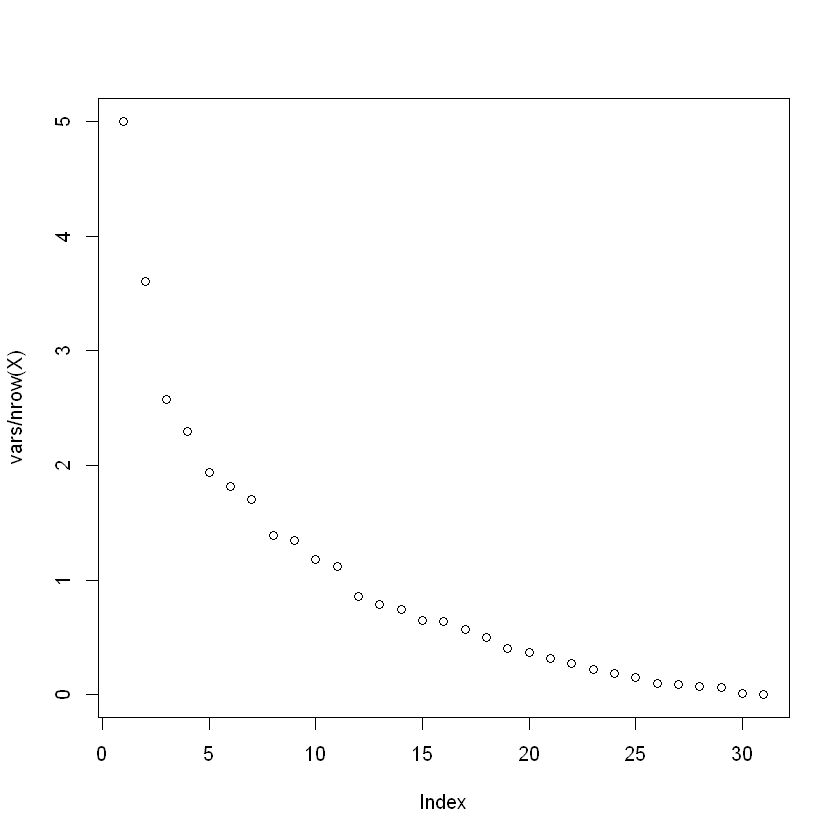

In [53]:
plot(vars/nrow(X))